1. El dataset tomado de kaggle es el siguiente: se llama Medical Costo Personal Dataset https://www.kaggle.com/datasets/mirichoi0218/insurance/data
2.  Este dataset contiene datos de costos de un seguro médico con características como edad, sexo, IMC, número de hijos y si el paciente es fumador.

  Mi idea es utilzar modelos de regresión para tratar de predecir el precio de los seguros medicos porque estas predicciones pueden ser utilizadas por compañias que se dediquen a vender este tipo de productos y asi podrian saber los gastos en los que incurriria una persona segun algunas de sus caracteristicas.

  **Descripción de las Variables**


  *   `age`: Edad del paciente (numérico).
  *   `sex`: Género del paciente (categórico: masculino/femenino).
  *   `bmi`: Índice de Masa Corporal (IMC) del paciente, que indica si tiene un peso
  *   `bmi`: Índice de Masa Corporal (IMC) del paciente, que indica si tiene un peso saludable (numérico).

  * `children`: Número de hijos dependientes del paciente (numérico).
  * `smoker`: Si el paciente es fumador (categórico: sí/no).
  * `region`: Región geográfica del paciente (categórico).
  * `charges`: Costo médico (variable objetivo, numérica).

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
import seaborn as sb
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.neighbors import KNeighborsRegressor
insurance = pd.read_csv('insurance.csv')
dfcopy = insurance.copy()

In [3]:
# Mostrar las columnas del dataset
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# Mostrar la información de las columnas del conjunto de datos
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Hay 3 variables de tipo object. 'sex', 'smoker' y 'region. Más adelante las vamos a convertir a variables de tipo int64

In [5]:
# Verificar que efectivamente no hay nulos
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
# Confirmar que tan grande es el dataset
insurance.shape

(1338, 7)

In [7]:
# Miramos las estadisticas descriptivas básicas para las variables numericas
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Se pueden ver diferentes datos, hablaremos de algunos de los mas relevantes:

*   La edad media es de 39 años, desde los 18 hasta los 64 años
*   El promedio de bmi es 30.66, lo cual se considera en el rango de sobrepeso según las pautas de salud. Tambien se puede ver que hay una amplia gama de pesos relativos puesto que el bmi varia de 15.86 a como maximo 53.13
*   La media de hijos es de aproximadamente 1 hijo, si se miran los cuartiles se puede ver que el 50% de los registros tienen uno o menos, solo el 25% tienen ms de 2 hijos
* La media de los cargos médicos es 13,270.42, con una desviación estándar de 12,110. Esto puede indicar una gran variabilidad en los costos, mas adelante lo miraremos









In [9]:
# Averiguar cuantos registros hay por region en el dataset
insurance['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [10]:
insurance['smoker'] = insurance['smoker'].replace({'yes': 1, 'no': 0})
insurance['sex'] = insurance['sex'].replace({'female': 1, 'male': 0})

C:\Users\jhonh\AppData\Local\Temp\ipykernel_28180\1853044136.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance['smoker'] = insurance['smoker'].replace({'yes': 1, 'no': 0})
C:\Users\jhonh\AppData\Local\Temp\ipykernel_28180\1853044136.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance['sex'] = insurance['sex'].replace({'female': 1, 'male': 0})


In [11]:
# Convertir a binario 0/1 el campo 'region' (con northeast como referencia)
insurance = pd.get_dummies(insurance, columns=['region'], drop_first=True)

# Se convierten esas columnas región en datos int64
region_columns = ['region_northwest', 'region_southeast', 'region_southwest']
insurance[region_columns] = insurance[region_columns].astype(int)

In [12]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   sex               1338 non-null   int64  
 2   bmi               1338 non-null   float64
 3   children          1338 non-null   int64  
 4   smoker            1338 non-null   int64  
 5   charges           1338 non-null   float64
 6   region_northwest  1338 non-null   int64  
 7   region_southeast  1338 non-null   int64  
 8   region_southwest  1338 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 94.2 KB


In [13]:
insurance.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,0,0,1
1,18,0,33.770,1,0,1725.55230,0,1,0
2,28,0,33.000,3,0,4449.46200,0,1,0
3,33,0,22.705,0,0,21984.47061,1,0,0
4,32,0,28.880,0,0,3866.85520,1,0,0


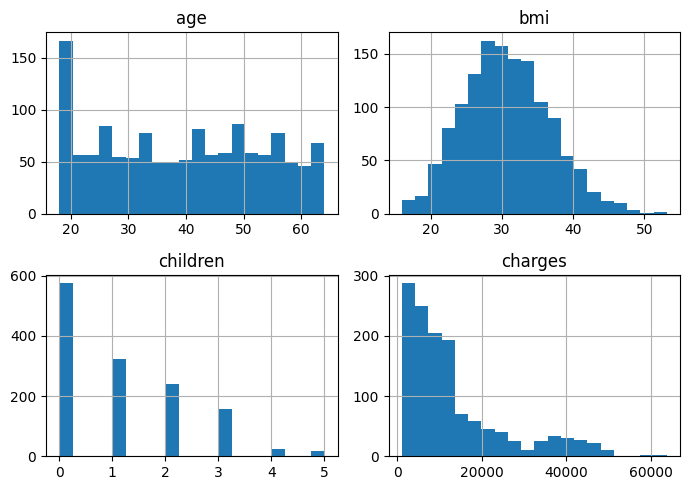

In [14]:
num_vars = ['age', 'bmi', 'children', 'charges']
insurance[num_vars].hist(bins=20, figsize=(7, 5))
plt.tight_layout()
plt.show()

En las anteriores graficas se puede la frecuencia para cada uno de las caracteristicas numericas del dataset, se puede ver por ejemplo en 'bmi' que la moda esta mas o menos por los valores cercanos a 30, cosa que tiene mucho sentido despues de haber visto insurance.describe(). También se puede ver que 'charges' que es la variable objetivo tiene sus mayores picos para valores menores que $15000 mas o menos.

Text(0.5, 1.0, 'Showing the distribution of number of children of the patients')

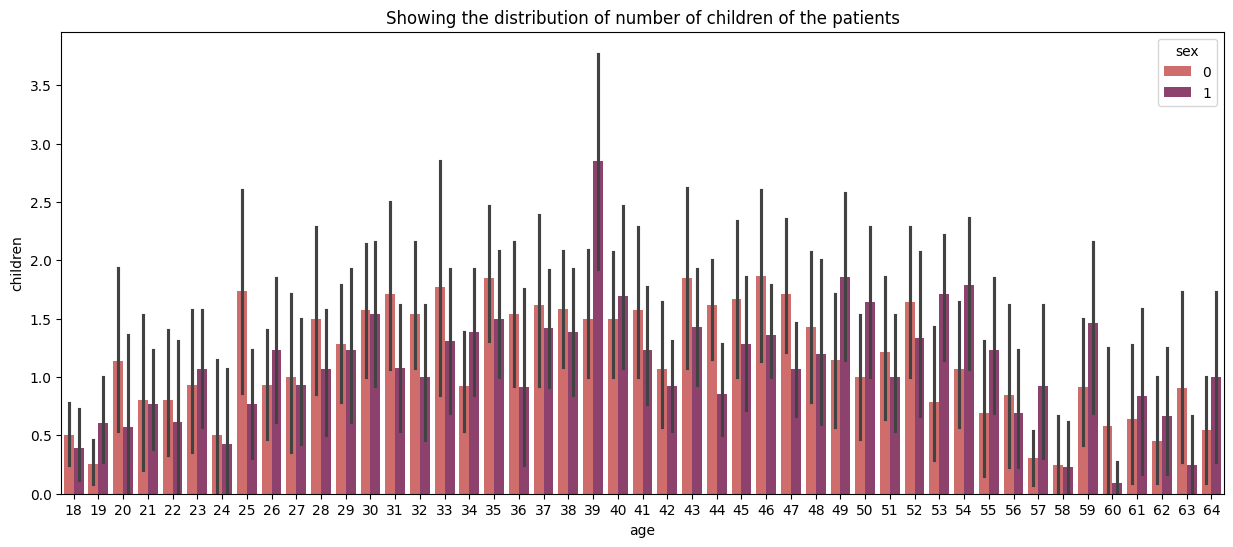

In [15]:
ax= plt.figure(figsize=(15,6))
sb.barplot(x='age', y='children', data=insurance, palette='flare', hue='sex' )
plt.title('Showing the distribution of number of children of the patients')

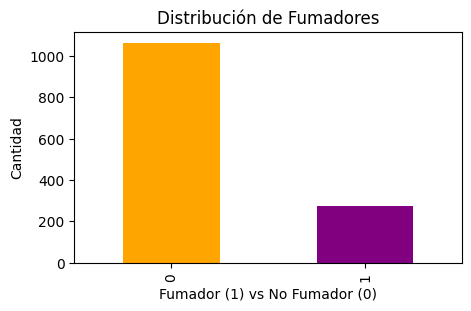

In [16]:
plt.figure(figsize=(5, 3))
insurance['smoker'].value_counts().plot(kind='bar', color=['orange', 'purple'])
plt.title("Distribución de Fumadores")
plt.xlabel("Fumador (1) vs No Fumador (0)")
plt.ylabel("Cantidad")
plt.show()

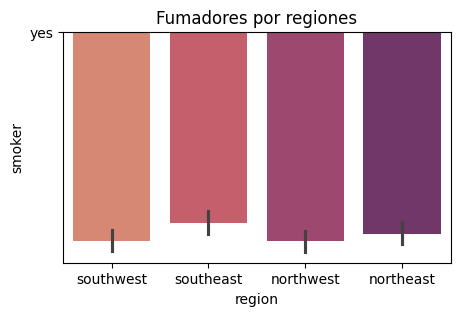

In [17]:
# Gráfico con 'hue' y sin leyenda
ax = plt.figure(figsize=(5,3))
sb.barplot(x='region', y='smoker', data=dfcopy, palette='flare', hue='region', dodge=False)
plt.legend([],[], frameon=False)  # Oculta la leyenda
plt.title('Fumadores por regiones')
plt.show()

Este grafico es informativo, hecho por mi curiosidad. Nos dice los fumadores por regiones y se puede evidenciar que para las 4 regiones tomadas en cuenta en el dataset los valores son bastante parecidos. Tiene mucho sentido porque si miramos el bloque 7 de codigo de este notebook podemos ver que los fumadores tienen valores muy cercanos para las 4 regiones.

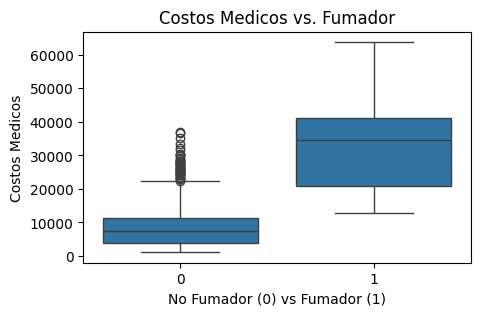

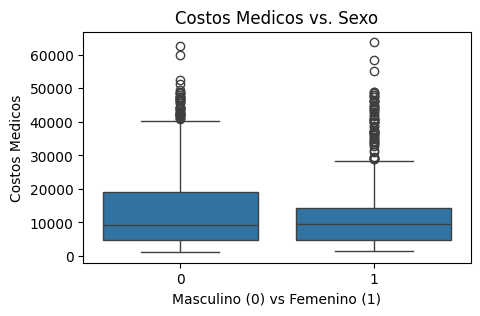

In [18]:
# Graficas para las dos de las variables no numericas
plt.figure(figsize=(5, 3))
sb.boxplot(x='smoker', y='charges', data=insurance)
plt.title("Costos Medicos vs. Fumador")
plt.xlabel("No Fumador (0) vs Fumador (1)")
plt.ylabel("Costos Medicos")
plt.show()
print("")
plt.figure(figsize=(5, 3))
sb.boxplot(x='sex', y='charges', data=insurance)
plt.title("Costos Medicos vs. Sexo")
plt.xlabel("Masculino (0) vs Femenino (1)")
plt.ylabel("Costos Medicos")
plt.show()

Estos dos graficos son importes porque muestran 'charges' vs las variables no numericas. El primero nos muestra que los fumadores tienden a tener costos medicos mucho mas altos y la distribucion es mas amplia. Los fumadores en promedio tienen costos medicos mas elevados que los no fumadores, más adelante veremos si esta variable tiene una alta correlación con la variable objetivo 'charges'. El segundo grafico muestra que la distribucion para ambos sexos es muy similar y también se puede ver que tanto hombres como mujeres tienen altos niveles atipicos pero no hay demasiada diferencia entre ambos lo que indica que 'charges' no es muy variable male y female

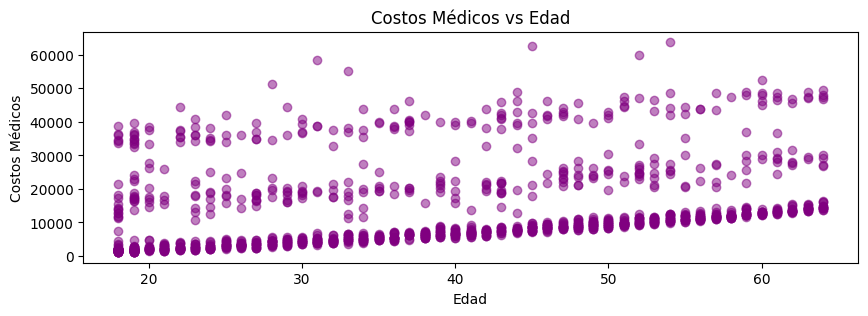

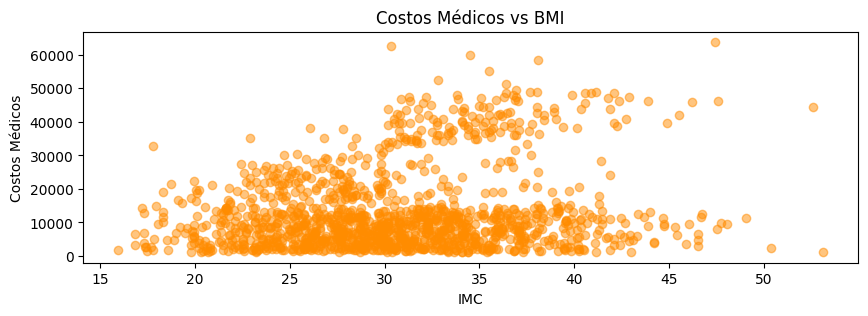

In [19]:
# Grafica para dos de las variables numericas
plt.figure(figsize=(10, 3))
plt.scatter(insurance['age'], insurance['charges'], alpha=0.5, color='purple')
plt.title("Costos Médicos vs Edad")
plt.xlabel("Edad")
plt.ylabel("Costos Médicos")
plt.show()
print("")
plt.figure(figsize=(10, 3))
plt.scatter(insurance['bmi'], insurance['charges'], alpha=0.5, color='darkorange')
plt.title("Costos Médicos vs BMI")
plt.xlabel("IMC")
plt.ylabel("Costos Médicos")
plt.show()

Los dos graficos anteriores muestran 'charges' vs dos de las variables numericas del dataset. La primera grafica se pueden bastante dispersion para las edades pero se puede ir viendo una pequeña correlación porque a medida que la edad va aumentando se puede ir viendo que 'charges' también va aumentando progresivamente. El segundo grafico *Costos Medicos vs BMI* se puede ver más datos para valores cercanos a la media de **BMI** que como lo vimos anteriormente es 30, allí tambien se puede ver más datos en los costos médicos bajos y no tantos registros de datos en los valores altos. Luego en la matriz de correlación veremos que tan relacionada esta esta variable con 'charges'



<Figure size 1000x700 with 0 Axes>

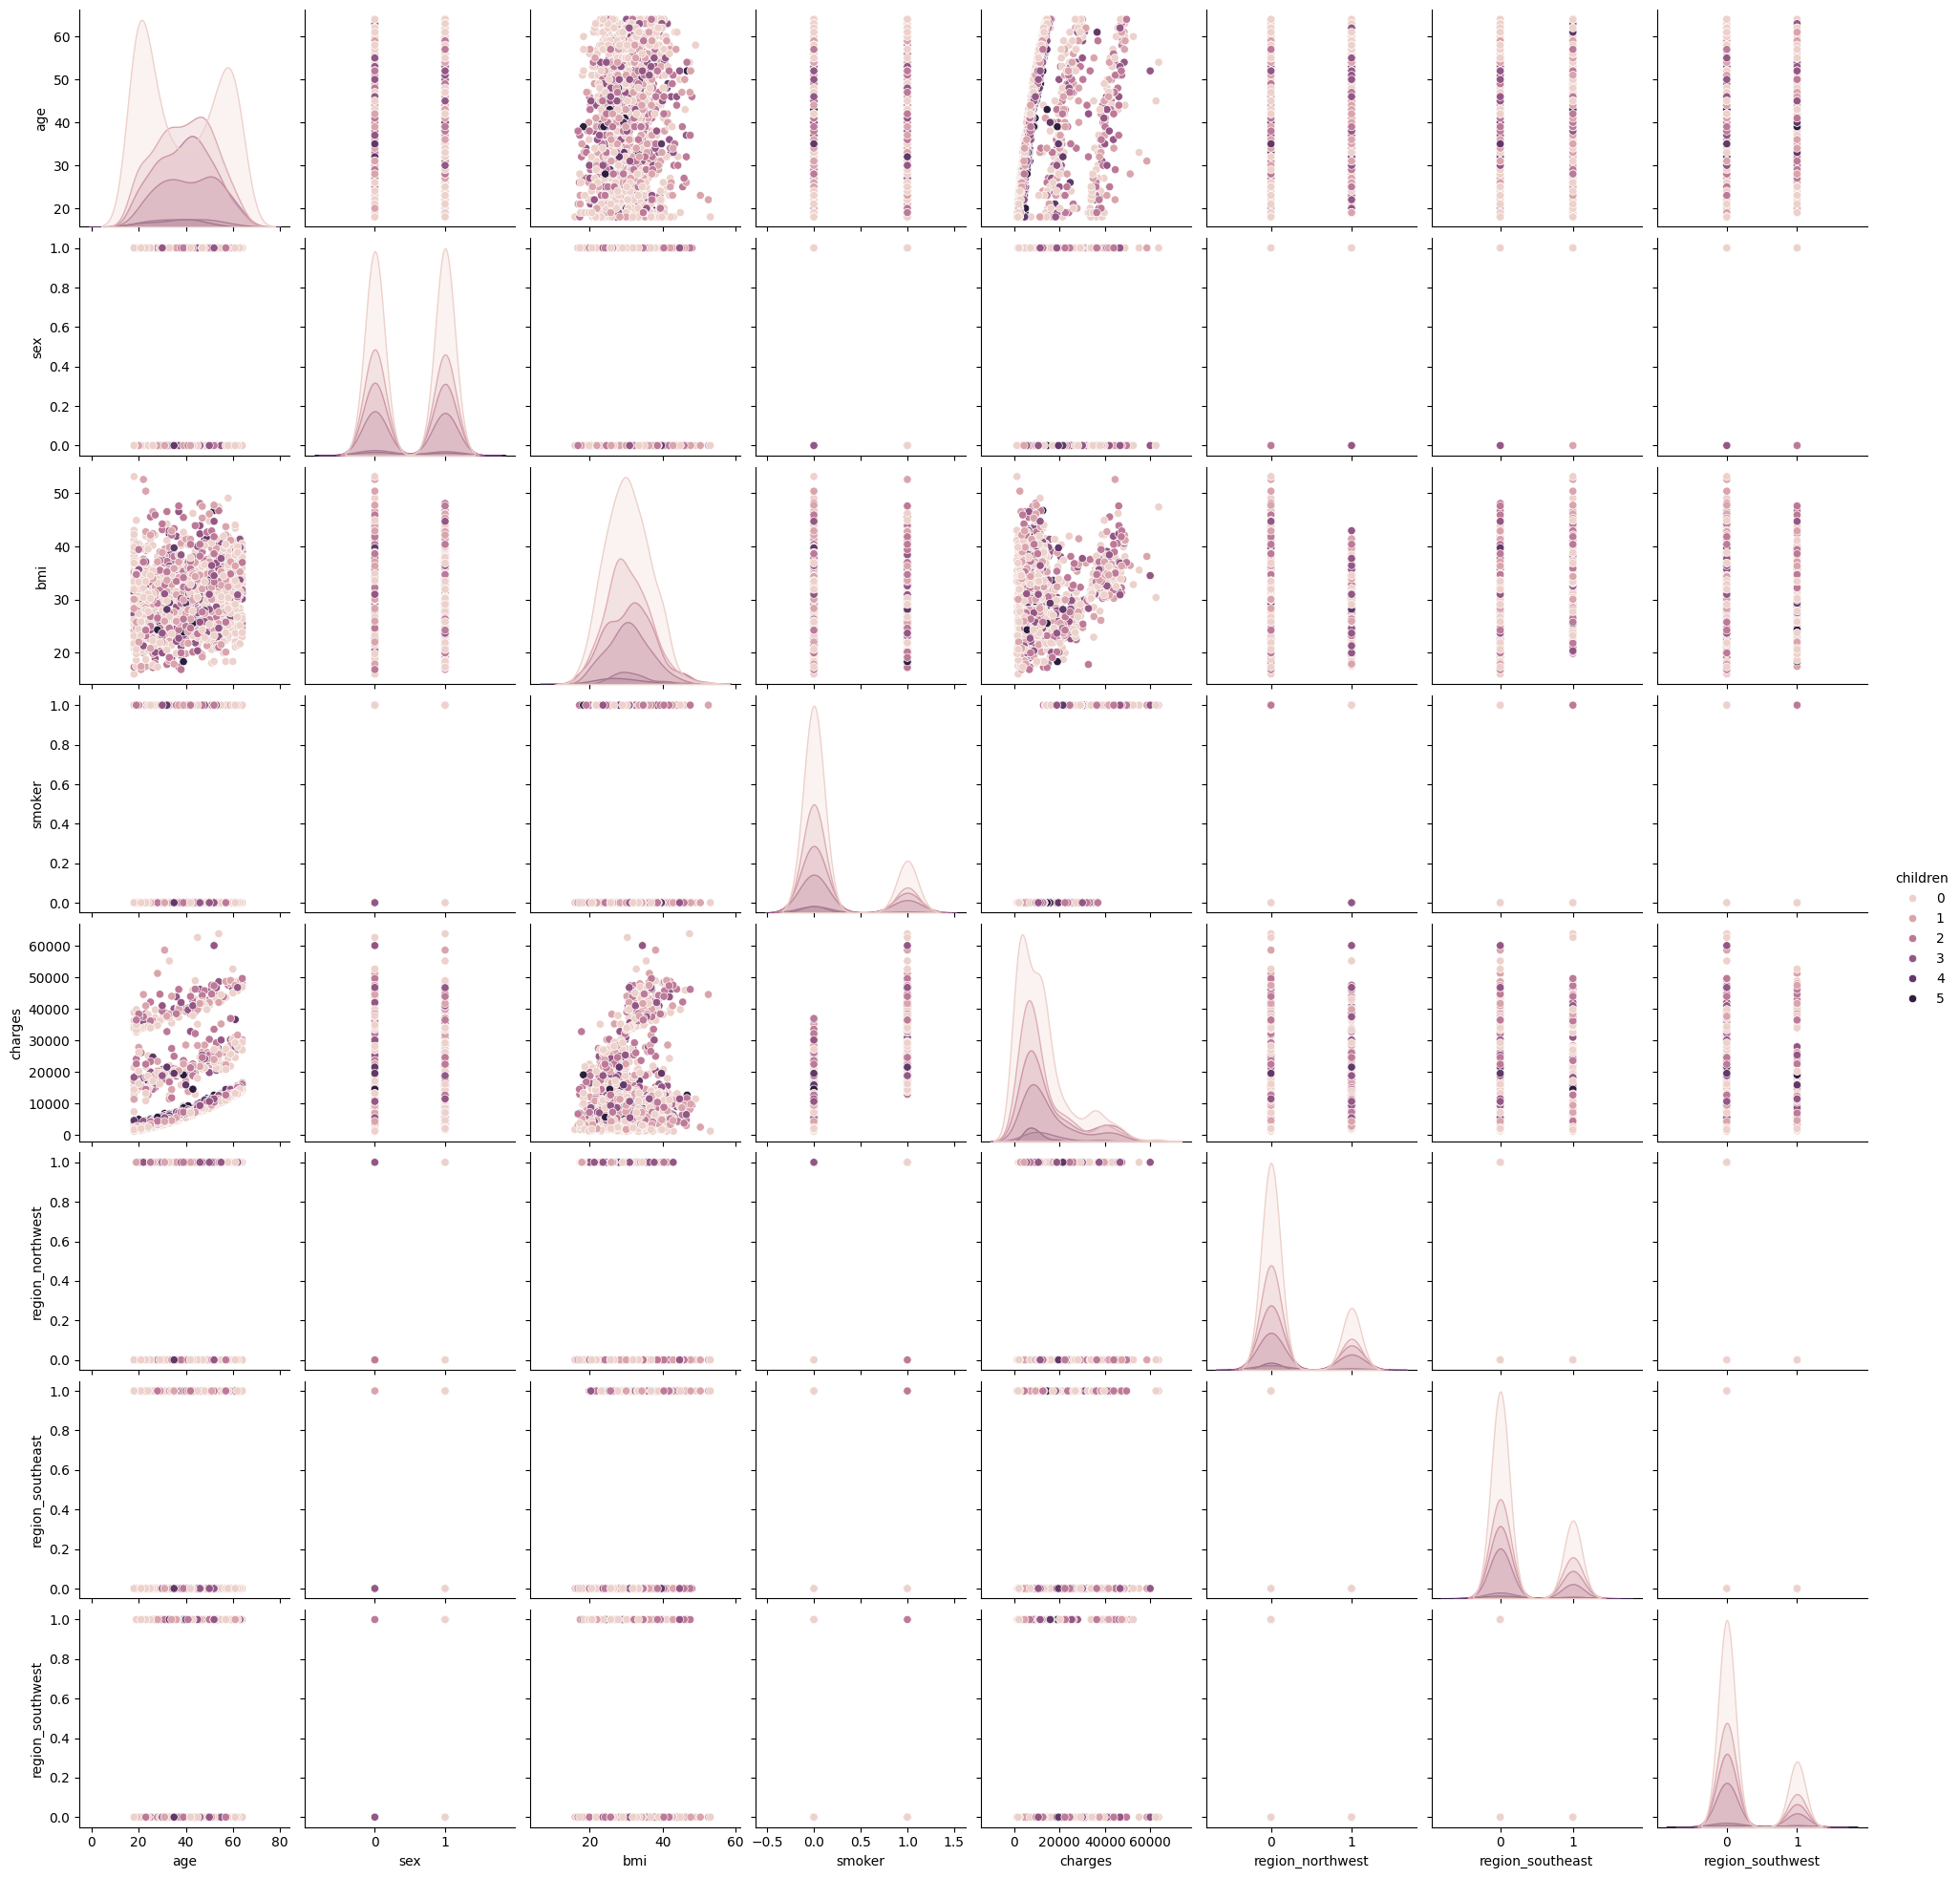

In [20]:
plt.figure(figsize=(10, 7))
sb.pairplot(insurance,hue='children')

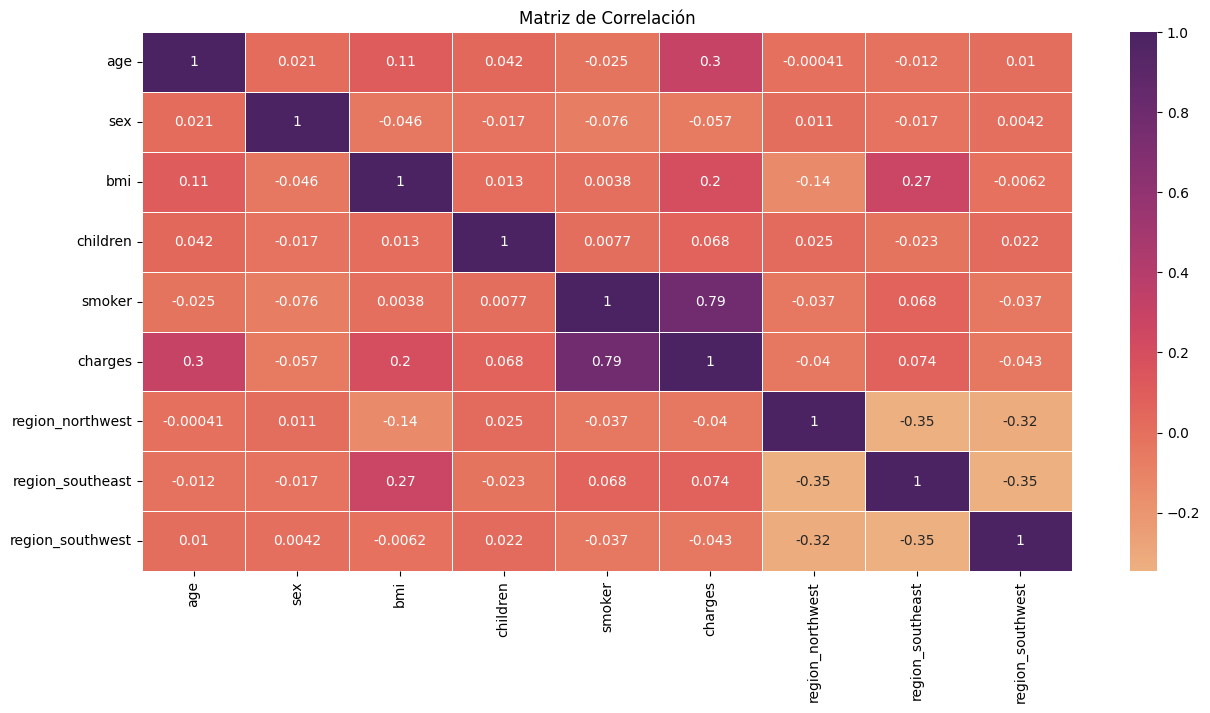

In [21]:
# Mapa de correlacion con todas las variables
plt.figure(figsize=(15, 7))
sb.heatmap(insurance.corr(), annot=True, cmap='flare', linewidths=0.5)
plt.title("Matriz de Correlación")
plt.show()

Este mapa de correlación es muy interesante y casi que es capaz de resumirnos todo lo que se ha visto hasta el momento del analisis exploratorio. La conclusión de este analisis exploratorio es que 'charges' y 'smoker' son variables que tienen una relativa alta correlación con respecto a las otras variables con un 79%, eso quiere decir que 'charges' puede ser descrita en gran medida por esta variable puesto que es la que más correlacionada esta. De ahí podemos ver que 'age' y 'bmi' son las siguientes más correlacionadas con un 30% y 20% respectivamente



**3. CONCLUSIONES DEL ANALISIS EXPLORATORIO**

**¿Cómo afecta el hecho de ser fumador o no en los costos médicos?**
Fumar tiene un impacto significativo en la salud y eso se puede evidenciar en los costos medicos. Con respecto de todos esta es la variable que más afecta a la variable objetivo. Es decir que si una persona fuma, es muy probable que sus costos médicos aumenten

**¿Cuáles son las variables más correlacionadas con los costos médicos?**
La mayor sin duda es 'smoker', viendo en gráficas como los fumadores tenían más probabilidad de aumento en sus costos, luego la edad evidenciando que para edades más avanzadas los costos van aumentando y por ultimo bmi.


In [ ]:
# @title METODOS DE SELECCION DE CARACTERISTICAS

# Seleccion de Características Basada en Correlación (Método Estadístico)

threshold = 0.1 #umbral de decision
selected_features_corr = insurance.corr()['charges'].abs()
selected_features_corr = selected_features_corr[selected_features_corr >= threshold].index.tolist()
selected_features_corr.remove('charges')

print("Características seleccionadas (Método Estadístico):")
print(selected_features_corr)
insurance_corr_selected = insurance[selected_features_corr + ['charges']]
# print("\nDataset con las características seleccionadas (Correlacion):")
# print(insurance_corr_selected)

# Seleccion de Caracteristicas con SelectKBest (metodo Basado en Pruebas Estadísticas)

X = insurance.drop('charges', axis=1)  # Características
y = insurance['charges']  # Variable objetivo

# seleccionar las 5 mejores caracteristicas
selector = SelectKBest(score_func=f_regression, k=5)
X_selected = selector.fit_transform(X, y)

# obtener los nombres de las características seleccionadas
selected_features_kbest = X.columns[selector.get_support()].tolist()
insurance_kbest_selected = insurance[selected_features_kbest + ['charges']]

print("\nCaracterísticas seleccionadas (SelectKBest):")
print(selected_features_kbest)
# print("\nDataset con las características seleccionadas:")
# print(insurance_kbest_selected)

Características seleccionadas (Método Estadístico):
['age', 'bmi', 'smoker']

Características seleccionadas (SelectKBest):
['age', 'bmi', 'children', 'smoker', 'region_southeast']


In [ ]:
# @title DIVISION DE LOS DATOS

# División de los datos para la base completa
X_train_complete, X_test_complete, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# División y escalado para el método de selección 1 (correlación)
X_corr = insurance[selected_features_corr]
X_train_corr, X_test_corr, _, _ = train_test_split(X_corr, y, test_size=0.2, random_state=42)

scaler_corr = StandardScaler()
X_train_corr_scaled = scaler_corr.fit_transform(X_train_corr)
X_test_corr_scaled = scaler_corr.transform(X_test_corr)

# División y escalado para el método de selección 2 (SelectKBest)
X_kbest = insurance[selected_features_kbest]
X_train_kbest, X_test_kbest, _, _ = train_test_split(X_kbest, y, test_size=0.2, random_state=42)

scaler_kbest = StandardScaler()
X_train_kbest_scaled = scaler_kbest.fit_transform(X_train_kbest)
X_test_kbest_scaled = scaler_kbest.transform(X_test_kbest)


In [ ]:
# @title REGRESION LINEAL PARA LOS 3 ESCENARIOS

def train_evaluate_optimize(X_train, X_test, y_train, y_test):
    # Búsqueda en cuadrícula para encontrar los mejores parámetros
    param_grid = {'fit_intercept': [True, False]}
    grid_search = GridSearchCV(LinearRegression(), param_grid, scoring='neg_mean_squared_error', cv=5)
    grid_search.fit(X_train, y_train)

    # Mejor modelo
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_
    print("Mejores parámetros:", best_params)

    # Predicciones en el conjunto de prueba
    y_pred_test = best_model.predict(X_test)
    mse_test = mean_squared_error(y_test, y_pred_test)
    mae_test = mean_absolute_error(y_test, y_pred_test)
    r2_test = r2_score(y_test, y_pred_test)

    # Predicciones en el conjunto de entrenamiento
    y_pred_train = best_model.predict(X_train)
    mse_train = mean_squared_error(y_train, y_pred_train)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    r2_train = r2_score(y_train, y_pred_train)

    # Imprimir resultados
    print("Conjunto de Entrenamiento:")
    print("MSE (entrenamiento):", mse_train)
    print("MAE (entrenamiento):", mae_train)
    print("R² Score (entrenamiento):", r2_train)

    print("Conjunto de Prueba:")
    print("MSE (prueba):", mse_test)
    print("MAE (prueba):", mae_test)
    print("R² Score (prueba):", r2_test)

    # Análisis de sobreajuste y sobreentrenamiento
    if abs(r2_train - r2_test) > 0.1:
        print("\nPosible indicio de sobreajuste: el R² en el conjunto de prueba es significativamente menor que en el de entrenamiento.")
    else:
        print("No se detecta indicio fuerte de sobreajuste.\n")

    return best_model, mse_test, mae_test, r2_test


print("Resultados con Selección Basada en Correlación")
model_corr, mse_corr, mae_corr, r2_corr = train_evaluate_optimize(X_train_corr, X_test_corr, y_train, y_test)

print("\nResultados con Selección SelectKBest")
model_kbest, mse_kbest, mae_kbest, r2_kbest = train_evaluate_optimize(X_train_kbest, X_test_kbest, y_train, y_test)

print("\nResultados con Base Completa")
model_complete, mse_complete, mae_complete, r2_complete = train_evaluate_optimize(X_train_complete, X_test_complete, y_train, y_test)

Resultados con Selección Basada en Correlación
Mejores parámetros: {'fit_intercept': True}
Conjunto de Entrenamiento:
MSE (entrenamiento): 37638069.17025345
MAE (entrenamiento): 4242.183081870755
R² Score (entrenamiento): 0.7392286795956207
Conjunto de Prueba:
MSE (prueba): 34512843.8802279
MAE (prueba): 4260.560091099392
R² Score (prueba): 0.7776932310583374
No se detecta indicio fuerte de sobreajuste.


Resultados con Selección SelectKBest
Mejores parámetros: {'fit_intercept': True}
Conjunto de Entrenamiento:
MSE (entrenamiento): 37358292.13070338
MAE (entrenamiento): 4212.2815754295925
R² Score (entrenamiento): 0.7411670847697085
Conjunto de Prueba:
MSE (prueba): 33820228.13905256
MAE (prueba): 4200.4893002098415
R² Score (prueba): 0.7821545605295676
No se detecta indicio fuerte de sobreajuste.


Resultados con Base Completa
Mejores parámetros: {'fit_intercept': True}
Conjunto de Entrenamiento:
MSE (entrenamiento): 37277681.70201866
MAE (entrenamiento): 4208.234572492223
R² Score (e

Para todos los casos el modelo tiene un ```fit_intercept: True``` lo que quiere decir que el modelo ajusta un intercepto en vez de dejarlo por default y=0. Discutamos las metricas:


1.   `MSE:` el MSE mas bajo es el modelo que utiliza la *base completa*, pero no tiene demasiada difencia con el metodo **SelectKBest**. Podemos ver que entre más caracteristicas utilice al parecer el modelo es mejor para esta metrica.
2.  `MAE: `el modelo con mejor desempeño para esta metrica (mas bajo) fue la **base completa**. Eso quiere decir entonces que este modelo tiene unas predicciones más cercanas a los valores reales
3.  `R²:` el mejor modelo para esta metrica es **base completa**. Quiere decir que el 78.35% de la variabilidad de los datos es explicada por este modelo. De nuevo, el metodo **SelectKBest** no está muy lejos de ser el mejor, puesto que la diferencia es relativamente pequeña.

No se ve que haya un indicio se sobreajuste teniendo en cuenta la metrica` R² `la cual no tiene mucha diferencia entre su resultado en el conjunto de entrenamiento y pruebas

Conclusión sobre este modelo:
Los resultados quieren decir que el modelo de **base completa** es el mejor de los modelos en terminos de metricas y no tiene indicios de sobreajuste, en terminos de costo computacional quizas es un poco mas costoso que los otros metodos de caracteristicas teniendo en cuenta que el modelo con la **base completa** utiliza todas las caracteristicas mientras que los otros metodos las reducen, sin embargo no es muy significativa porque todos se ejecutan bastante rapido, como es de esperarse en una regresion lineal.



In [ ]:
# @title KNN REGRESION PARA LOS 3 ESCENARIOS
def train_evaluate_knn_regressor(X_train, X_test, y_train, y_test):
    # Búsqueda en cuadrícula para optimizar el número de vecinos
    param_grid = {'n_neighbors': range(1, 21)}
    grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, scoring='neg_mean_squared_error', cv=5)
    grid_search.fit(X_train, y_train)

    # Mejor modelo encontrado
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_
    print("Mejores parámetros:", best_params)

    # Predicciones en el conjunto de prueba
    y_pred_test = best_model.predict(X_test)
    mse_test = mean_squared_error(y_test, y_pred_test)
    mae_test = mean_absolute_error(y_test, y_pred_test)
    r2_test = r2_score(y_test, y_pred_test)

    # Predicciones en el conjunto de entrenamiento
    y_pred_train = best_model.predict(X_train)
    mse_train = mean_squared_error(y_train, y_pred_train)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    r2_train = r2_score(y_train, y_pred_train)

    # Imprimir resultados
    print("Conjunto de Entrenamiento:")
    print("MSE (entrenamiento):", mse_train)
    print("MAE (entrenamiento):", mae_train)
    print("R² Score (entrenamiento):", r2_train)

    print("Conjunto de Prueba:")
    print("MSE (prueba):", mse_test)
    print("MAE (prueba):", mae_test)
    print("R² Score (prueba):", r2_test)

    # Análisis de sobreajuste y sobreentrenamiento
    if abs(r2_train - r2_test) > 0.1:
        print("Posible indicio de sobreajuste: el R² en el conjunto de prueba es significativamente menor que en el de entrenamiento.")
    else:
        print("No se detecta indicio fuerte de sobreajuste.\n")

    return best_model, mse_test, mae_test, r2_test

print("Resultados con Selección Basada en Correlación")
model_corr_knn, mse_corr, mae_corr, r2_corr = train_evaluate_knn_regressor(X_train_corr_scaled, X_test_corr_scaled, y_train, y_test)

print("\nResultados con Selección SelectKBest")
model_kbest_knn, mse_kbest, mae_kbest, r2_kbest = train_evaluate_knn_regressor(X_train_kbest_scaled, X_test_kbest_scaled, y_train, y_test)

print("\nResultados con Base Completa")
model_complete_knn, mse_complete, mae_complete, r2_complete = train_evaluate_knn_regressor(X_train_complete, X_test_complete, y_train, y_test)


Resultados con Selección Basada en Correlación
Mejores parámetros: {'n_neighbors': 20}
Conjunto de Entrenamiento:
MSE (entrenamiento): 21686719.522086475
MAE (entrenamiento): 2758.305752846729
R² Score (entrenamiento): 0.8497458926643489
Conjunto de Prueba:
MSE (prueba): 20131430.753560964
MAE (prueba): 2658.241232126866
R² Score (prueba): 0.8703278889294647
No se detecta indicio fuerte de sobreajuste.


Resultados con Selección SelectKBest
Mejores parámetros: {'n_neighbors': 12}
Conjunto de Entrenamiento:
MSE (entrenamiento): 21706545.625055335
MAE (entrenamiento): 2743.4276542858256
R² Score (entrenamiento): 0.8496085296389961
Conjunto de Prueba:
MSE (prueba): 22192302.800054155
MAE (prueba): 2855.301869371269
R² Score (prueba): 0.8570532423240437
No se detecta indicio fuerte de sobreajuste.


Resultados con Base Completa
Mejores parámetros: {'n_neighbors': 12}
Conjunto de Entrenamiento:
MSE (entrenamiento): 105763257.74933898
MAE (entrenamiento): 7644.20774283567
R² Score (entrenami

**Escenario con Selección Basada en Correlación**


Los mejores parametros fueron `n_neighbors=20`.
y analizando las metricas se puede ver que tiene un buen ajuste en ambos conjuntos, con `MSE` y `MAE` bajos y` R²` alto (0.85 en entrenamiento y 0.87 en prueba). No hay indicios de sobreajuste, lo que quiere decir que el modelo generaliza bien.

**Escenario con SelectKBest**

Para este modelo los parametros fueron `n_neighbors=12`. Este modelo tiene un rendimiento aceptable y similar en ambos conjuntos (`R²` de 0.84 en entrenamiento y 0.85 en prueba), sin sobreajuste. Aunque es ligeramente menos preciso que el modelo basado en correlación, sigue siendo razonable.


**Escenario con Base Completa**

Al igual que el escenario anterior tiene la misma cantidad de `n_neighbors=12`. Los resultados para este modelo muestran que hay un pobre ajuste en ambos conjuntos (`R²` de 0.26 en entrenamiento y 0.18 en prueba), lo que indica que este modelo no esta ajustando bien los datos utilizando todas las variables (caracteristicas) del dataset. Lo que podria llevar a hacer una comparacion entre los modelos con seleccion de caracteristicas y los que no:

**Comparacion**

El mejor modelo es el que usa el metodo de **correlacion** que produce el mejor rendimiento, la elección de 20 vecinos parece que ayudo a reducir el ruido y mejorar la generalizacion del modelo sin caer en el error de sobreajuste. Y es que **SelectKBest** también tuvo un buen rendimiento y este también fue un metodo de seleccion de caracteristicas, el unico malo fue el que utiliza todas las caracteristicas del dataset, lo que quiere decir esto es la importancia de saber elegir las caracteristicas que mas afectan a la variable objetivo, eso evitará que pasen cosas como en este ultimo escenario donde el modelo es realmente malo debido a que recibe caracteristicas que son irrelevantes.

**Considercion costo computacional**

Un valor de `n_neighbors` más alto como en el caso de la selección basada en correlación, puede tener un mayor costo computacional. Pero en este caso el aumento en vecinos parece mejorar el modelo. Además de que el tiempo de ejecución en la máquina no supero los 2 segundos. Entonces, el modelo con selección basada en correlación es el más equilibrado entre costo computacional y rendimiento

In [ ]:
# @title SVM REGRESION PARA LOS 3 ESCENARIOS

def train_evaluate_svr(X_train, X_test, y_train, y_test):
    # Búsqueda en cuadrícula para optimizar el parámetro C
    param_grid = {'C': [10, 100, 1000, 3000, 10000]}
    grid_search = GridSearchCV(SVR(kernel='linear'), param_grid, scoring='neg_mean_squared_error', cv=5)
    grid_search.fit(X_train, y_train)

    # Mejor modelo encontrado
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_
    print("Mejores parámetros:", best_params)

    # Predicciones en el conjunto de prueba
    y_pred_test = best_model.predict(X_test)
    mse_test = mean_squared_error(y_test, y_pred_test)
    mae_test = mean_absolute_error(y_test, y_pred_test)
    r2_test = r2_score(y_test, y_pred_test)

    # Predicciones en el conjunto de entrenamiento
    y_pred_train = best_model.predict(X_train)
    mse_train = mean_squared_error(y_train, y_pred_train)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    r2_train = r2_score(y_train, y_pred_train)

    # Imprimir resultados
    print("Conjunto de Entrenamiento:")
    print("MSE (entrenamiento):", mse_train)
    print("MAE (entrenamiento):", mae_train)
    print("R² Score (entrenamiento):", r2_train)

    print("Conjunto de Prueba:")
    print("MSE (prueba):", mse_test)
    print("MAE (prueba):", mae_test)
    print("R² Score (prueba):", r2_test)

    # Análisis de sobreajuste y sobreentrenamiento
    if abs(r2_train - r2_test) > 0.1:
        print("\nPosible indicio de sobreajuste: el R² en el conjunto de prueba es significativamente menor que en el de entrenamiento.")
    else:
        print("No se detecta indicio fuerte de sobreajuste.\n")

    return best_model, mse_test, mae_test, r2_test

print("Resultados con Selección Basada en Correlación")
model_corr_svr, mse_corr, mae_corr, r2_corr = train_evaluate_svr(X_train_corr_scaled, X_test_corr_scaled, y_train, y_test)


print("\nResultados con Selección SelectKBest")
model_kbest_svr, mse_kbest, mae_kbest, r2_kbest = train_evaluate_svr(X_train_kbest_scaled, X_test_kbest_scaled, y_train, y_test)

print("\nResultados con Base Completa")
model_complete_svr, mse_complete, mae_complete, r2_complete = train_evaluate_svr(X_train_complete, X_test_complete, y_train, y_test)


Resultados con Selección Basada en Correlación
Mejores parámetros: {'C': 1000}
Conjunto de Entrenamiento:
MSE (entrenamiento): 48474922.04078247
MAE (entrenamiento): 3614.6514119627136
R² Score (entrenamiento): 0.664146708219967
Conjunto de Prueba:
MSE (prueba): 43177938.84709748
MAE (prueba): 3308.9378534683296
R² Score (prueba): 0.7218789588024077
No se detecta indicio fuerte de sobreajuste.


Resultados con Selección SelectKBest
Mejores parámetros: {'C': 1000}
Conjunto de Entrenamiento:
MSE (entrenamiento): 49174458.92357063
MAE (entrenamiento): 3511.5092279576247
R² Score (entrenamiento): 0.6593000420487807
Conjunto de Prueba:
MSE (prueba): 43054627.328117654
MAE (prueba): 3196.087680986971
R² Score (prueba): 0.7226732423871748
No se detecta indicio fuerte de sobreajuste.


Resultados con Base Completa
Mejores parámetros: {'C': 3000}
Conjunto de Entrenamiento:
MSE (entrenamiento): 48818980.96816172
MAE (entrenamiento): 3471.9739969304133
R² Score (entrenamiento): 0.6617629328890977

**Escenario con Selección Basada en Correlación**

Para este escenario el mejor parametro fue `c=1000`. El modelo muestra un buen ajuste con `R²`de 0.66 en entrenamiento y 0.72 en prueba, sin signos claros de sobreajuste. Eso quiere decir pues que el modelo es decente, generaliza bien pero no tiene un ajuste muy bueno que es lo que buscamos. Eso tambien se puede ver en la metrica `MAE` donde no es precisamente el porcentaje mas bajo

**Escenario con SelectKBest**

Para este escenario se puede ver el mejor parametro fue igual que en el escenario anterior `c=1000`. Este modelo es ligeramente superior al modelo de **correlacion** en el `R² Score` del conjunto de pruebas, pero tiene un rendimiento ligeramente menor en el conjunto de entrenamiento, es decir, el modelo generaliza un poco mejor en el conjunto de pruebas que el de entrenamiento en comparacion con el de **correlacion**. Ahora bien, mirando el ambos conjuntos (entrenamiento y prueba) de este mismo modelo podemos ver una mejora en el conjunto de prueba con respecto del conjunto de entrenamiento, lo cual también es bastante curioso y no sé a que se debe.

**Escenario con Base completa**

Aqui el mejor parametro fue `c=3000` y tambien se puede ver una mejora ligera en el conjunto de prueba, con `R²` de 0.66 en entrenamiento y 0.73 en prueba. Tambien sucede lo mismo, que es mejor en los datos de prueba que en los de mantenimiento. Este modelo también evita el sobreajuste y tiene un rendimiento equilibrado en ambos conjuntos, aunque la mejora es mínima con respecto a los otros.

**Costo computacional**

Al parecer el mejor escenario es el ultimo, el que utiliza la **base completa** y aunque está muy bien en terminos de rendimiento de las metricas no es tan eficiente en terminos de costo computacional, primero porque utiliza todas las caracteristicas del dataset, segundo porque escoge como mejor parametro `c=3000` lo que hace que el modelo trate de minimizar los errores y eso se convierte en mas costo computacional y tercero porque el tiempo que se demoró en ejecutar especificamente es modelo y este escenario fue superior al resto de todos los vistos en el notebook, alcanzando 1:25 (1 minuto 25 segundos) y eso teniendo en cuenta que usamos un kernel de tipo lineal y SVR que ayudaba a optimizar el hiperparametro c para regular la complejidad del modelo.

**Conclusion**

Teniendo en cuenta que los modelos tienen un rendimiento muy similar, el primer escenario podría ser el más optimo ya que es mas sencillo y menos costoso computacionalmente que los otros dos, esto debido a que el segundo escenario utiliza 

